In [15]:
import pandas as pd
import numpy as np

In [16]:
df=pd.read_csv("diabetes.csv")

In [17]:
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [18]:
df.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [19]:
df=df.drop(["PatientID"],axis=1)

In [20]:
df

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...
14995,10,65,60,46,177,33.512468,0.148327,41,1
14996,2,73,66,27,168,30.132636,0.862252,38,1
14997,0,93,89,43,57,18.690683,0.427049,24,0
14998,0,132,98,18,161,19.791645,0.302257,23,0


In [21]:
x=df[["Pregnancies","PlasmaGlucose","DiastolicBloodPressure","TricepsThickness","SerumInsulin","BMI","DiabetesPedigree","Age"]]
y=df.Diabetic

In [22]:
x

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...
14995,10,65,60,46,177,33.512468,0.148327,41
14996,2,73,66,27,168,30.132636,0.862252,38
14997,0,93,89,43,57,18.690683,0.427049,24
14998,0,132,98,18,161,19.791645,0.302257,23


In [23]:
y

0        0
1        0
2        0
3        1
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    1
Name: Diabetic, Length: 15000, dtype: int64

In [45]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(x,y)
from sklearn.model_selection import train_test_split
accuracy = []
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)
score = []

In [46]:
len(train_x),len(test_x),len(train_y),len(test_y)

(12000, 3000, 12000, 3000)

In [47]:
model.fit(train_x,train_y)

LogisticRegression(max_iter=1000)

In [48]:
acc=model.score(test_x,test_y)*100
accuracy.append(acc)
print('Test accuracy of Logistic Regression:',acc)

Test accuracy of Logistic Regression: 78.60000000000001


In [49]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(train_x,train_y)
scor = dc.score(test_x,test_y)*100
accuracy.append(scor)
print('Test accuracy of Decision Tree Classifier:',scor)

Test accuracy of Decision Tree Classifier: 89.96666666666667


In [50]:
from sklearn.svm import SVC
svm = SVC(random_state=2)
svm.fit(train_x,train_y)
sc = svm.score(test_x,test_y)*100
accuracy.append(sc)
print('Test accuracy of Support vector machine:',sc)

Test accuracy of Support vector machine: 80.16666666666666


In [51]:

from sklearn.ensemble import RandomForestClassifier
ram = RandomForestClassifier()
ram.fit(train_x,train_y)
sac=ram.score(test_x,test_y)*100
accuracy.append(sac)
print("Test accuracy of Random Forest Classifier :",sac)

Test accuracy of Random Forest Classifier : 93.73333333333333


In [ ]:
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

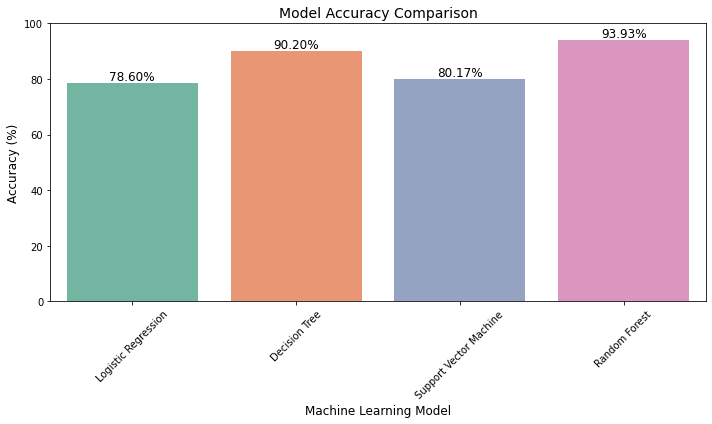

In [53]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
    
}
accuracy_results = {}
for model_name, model in models.items():
    model.fit(train_x, train_y)
  
    predictions = model.predict(test_x)
    accuracy = accuracy_score(test_y, predictions) * 100
    
    accuracy_results[model_name] = accuracy
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='Set2')

plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.xlabel('Machine Learning Model', fontsize=12)
plt.ylim(0, 100) 
plt.xticks(rotation=45)
plt.tight_layout()

for index, row in accuracy_df.iterrows():
    plt.text(index, row['Accuracy'] + 1, f'{row["Accuracy"]:.2f}%', ha='center', color='black', fontsize=12)

plt.show()

In [57]:
accuracy_results = {}
best_model = None
best_accuracy = 0

for model_name, model in models.items():
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    accuracy = accuracy_score(test_y, predictions) * 100
    accuracy_results[model_name] = accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

def predict_diabetes():
    print("Enter the following details to predict diabetes:")
    pregnancies = int(input("Number of Pregnancies: "))
    plasma_glucose = float(input("Plasma Glucose Level: "))
    diastolic_blood_pressure = float(input("Diastolic Blood Pressure: "))
    triceps_thickness = float(input("Triceps Thickness: "))
    serum_insulin = float(input("Serum Insulin Level: "))
    bmi = float(input("BMI (Body Mass Index): "))
    diabetes_pedigree = float(input("Diabetes Pedigree Function: "))
    age = int(input("Age: "))
    
    user_data = pd.DataFrame([[pregnancies, plasma_glucose, diastolic_blood_pressure, triceps_thickness, serum_insulin, bmi, diabetes_pedigree, age]],
                             columns=["Pregnancies", "PlasmaGlucose", "DiastolicBloodPressure", "TricepsThickness", "SerumInsulin", "BMI", "DiabetesPedigree", "Age"])
    

    prediction = best_model.predict(user_data)
    
   
    if prediction[0] == 1:
        print("User has diabetes")
    else:
        print("user not have diabetes")


predict_diabetes()

Enter the following details to predict diabetes:
Number of Pregnancies: 8
Plasma Glucose Level: 92
Diastolic Blood Pressure: 93
Triceps Thickness: 47
Serum Insulin Level: 36
BMI (Body Mass Index): 21.240576
Diabetes Pedigree Function: 0.158365
Age: 23
user not have diabetes
